___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Tensorflow Project Exercise
Let's wrap up this Deep Learning by taking a a quick look at the effectiveness of Neural Nets!

We'll use the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

This sort of task is perfectly suited for Neural Networks and Deep Learning! Just follow the instructions below to get started!

## Get the Data

** Use pandas to read in the bank_note_data.csv file **

In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('bank_note_data.csv')

** Check the head of the Data **

In [5]:
df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## EDA

We'll just do a few quick plots of the data.

** Import seaborn and set matplolib inline for viewing **

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

** Create a Countplot of the Classes (Authentic 1 vs Fake 0) **

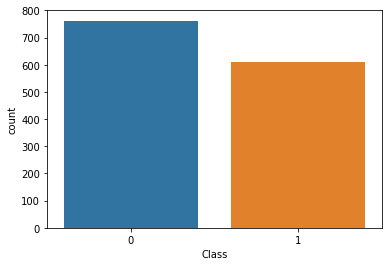

In [7]:
sns.countplot(x=df['Class'])

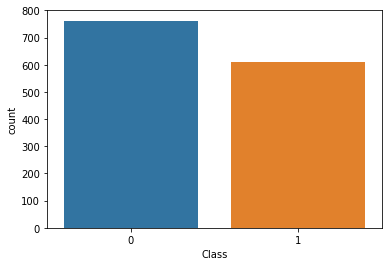

** Create a PairPlot of the Data with Seaborn, set Hue to Class **

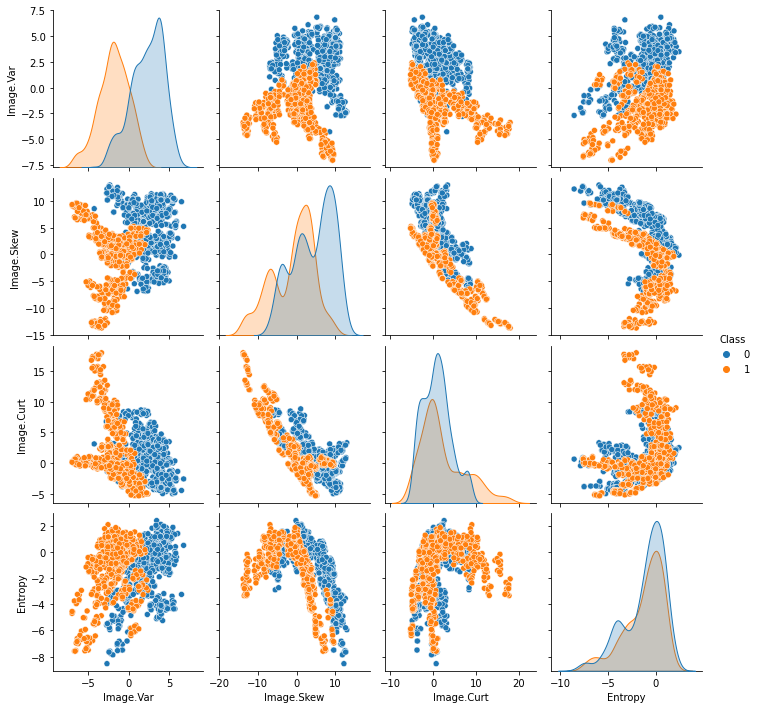

In [9]:
sns.pairplot(data=df,hue='Class')

C:\Users\Marcial\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Marcial\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Marcial\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


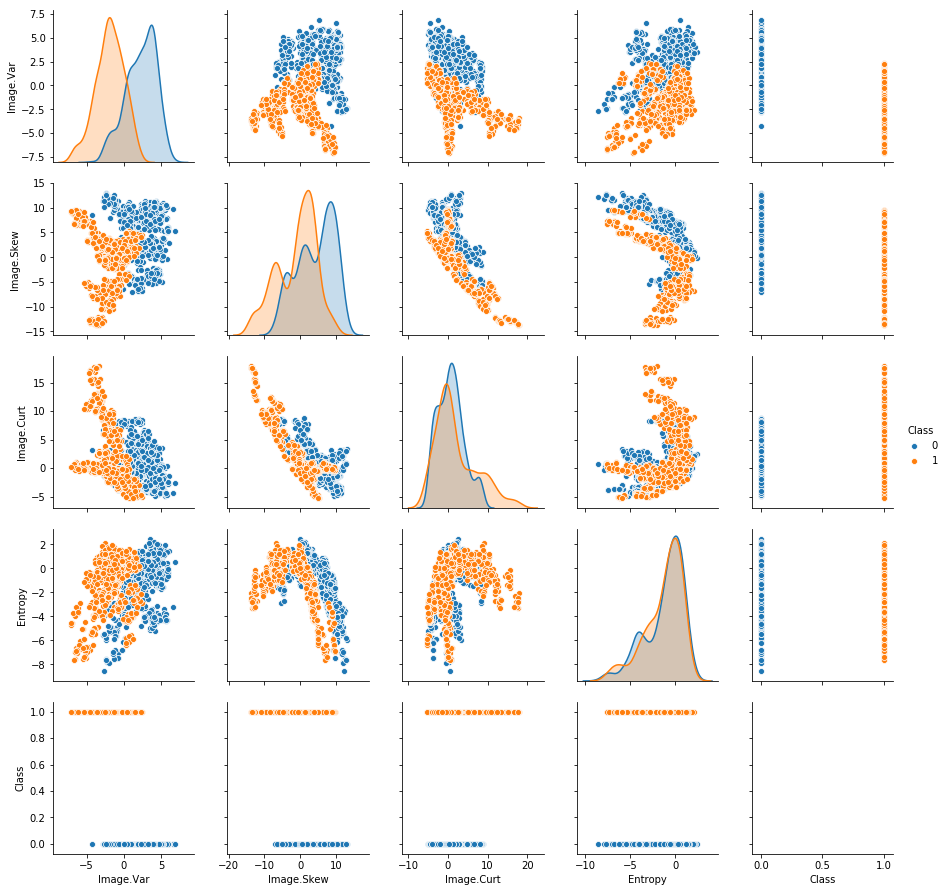

## Data Preparation 

When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize your data, this step isn't actually necessary for our particular data set, but let's run through it for practice!

### Standard Scaling



In [11]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**

In [12]:
scaler = StandardScaler()

**Fit scaler to the features.**

In [15]:
scaler.fit(df.drop('Class',axis=1))

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [17]:
scaled_feat = scaler.fit_transform(df.drop('Class',axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [21]:
scaled_df = pd.DataFrame(data= scaled_feat,columns= df.columns[:-1])

In [23]:
scaled_df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train Test Split

** Create two objects X and y which are the scaled feature values and labels respectively.**

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
X = scaled_df
y = df['Class']

** Use SciKit Learn to create training and testing sets of the data as we've done in previous lectures:**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Tensorflow

In [29]:
import tensorflow as tf

** Create a list of feature column objects using tf.feature.numeric_column() as we did in the lecture**

In [34]:
scaled_df.columns

Index(['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy'], dtype='object')

In [35]:
image_var = tf.feature_column.numeric_column("Image.Var")
image_skew = tf.feature_column.numeric_column('Image.Skew')
image_curt = tf.feature_column.numeric_column('Image.Curt')
entropy =tf.feature_column.numeric_column('Entropy')

In [36]:
feat_cols = [image_var,image_skew,image_curt,entropy]

** Create an object called classifier which is a DNNClassifier from learn. Set it to have 2 classes and a [10,20,10] hidden unit layer structure:**

In [37]:
classifier = tf.estimator.DNNClassifier(hidden_units=[10, 20, 10], n_classes=2,feature_columns=feat_cols)

** Now create a tf.estimator.pandas_input_fn that takes in your X_train, y_train, batch_size and set shuffle=True. You can play around with the batch_size parameter if you want, but let's start by setting it to 20 since our data isn't very big. **

In [82]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=40,shuffle=True)

** Now train classifier to the input function. Use steps=500. You can play around with these values if you want!**

*Note: Ignore any warnings you get, they won't effect your output*

In [83]:
classifier.train(input_fn=input_func,steps=500)

## Model Evaluation

** Create another pandas_input_fn that takes in the X_test data for x. Remember this one won't need any y_test info since we will be using this for the network to create its own predictions. Set shuffle=False since we don't need to shuffle for predictions.**

In [84]:
pred_fn =  tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)

** Use the predict method from the classifier model to create predictions from X_test **

In [85]:
note_predictions = list(classifier.predict(input_fn=pred_fn))

In [86]:
note_predictions[0] 


{'logits': array([0.04861935], dtype=float32),
 'logistic': array([0.51215243], dtype=float32),
 'probabilities': array([0.48784757, 0.51215243], dtype=float32),
 'class_ids': array([1]),
 'classes': array([b'1'], dtype=object),
 'all_class_ids': array([0, 1], dtype=int32),
 'all_classes': array([b'0', b'1'], dtype=object)}

In [87]:
final_preds  = []
for pred in note_predictions:
    final_preds.append(pred['class_ids'][0])

** Now create a classification report and a Confusion Matrix. Does anything stand out to you?**

In [88]:
from sklearn.metrics import classification_report,confusion_matrix

In [89]:
print(confusion_matrix(y_test,final_preds))

[[135 103]
 [  0 174]]


In [90]:
print(classification_report(y_test,final_preds))

              precision    recall  f1-score   support

           0       1.00      0.57      0.72       238
           1       0.63      1.00      0.77       174

    accuracy                           0.75       412
   macro avg       0.81      0.78      0.75       412
weighted avg       0.84      0.75      0.74       412



## Optional Comparison

** You should have noticed extremely accurate results from the DNN model. Let's compare this to a Random Forest Classifier for a reality check!**

**Use SciKit Learn to Create a Random Forest Classifier and compare the confusion matrix and classification report to the DNN model**

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rfc = RandomForestClassifier(n_estimators=200)

In [93]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [94]:
rfc_preds = rfc.predict(X_test)

In [95]:
print(classification_report(y_test,rfc_preds))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       238
           1       0.98      1.00      0.99       174

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



             precision    recall  f1-score   support

          0       0.99      1.00      0.99       215
          1       0.99      0.99      0.99       197

avg / total       0.99      0.99      0.99       412



In [96]:
print(confusion_matrix(y_test,rfc_preds))

[[234   4]
 [  0 174]]


** It should have also done very well, possibly perfect! Hopefully you have seen the power of DNN! **

# Great Job!